# Protein Works Marketing Data Presentation

### Set-up of dependencies

Before starting, we shall do the necessary set-up for this project. Firstly, we install the appropriate packages using pip into you virtual environment in order to import the python packages we need.

In [3]:
pip install pandas
pip install fsspec
pip install openpyxl
pip install seaborn
pip install matplotlib

     ---------------------------------------- 11.1/11.1 MB 8.0 MB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 15.6/15.6 MB 6.6 MB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Once these packages have been installed, we then import them to our interactive notebook in order to use them in this project.

In [86]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning) #to ignore warning messages from seaborn plots

import pandas as pd #package for creating dataframe
import seaborn as sns #package for visualisation
import matplotlib.pyplot as plt #package for visualisation

### Task 1 (Marketing Metrics)

We begin by loading in the relevent datasets from the given excel file. We label the dataset regarding the marketing data as *marketing_data_df* and the dataset for the trading data as *trading_data_df*. 

In [99]:
file_path = r"C://Users//Daniel H//Desktop//Protein Work Project//Data and Presentation Brief.xlsx" #path of excel file
marketing_data_df = pd.read_excel(file_path, sheet_name = 0) #load excel file of dataset into pandas dataframe
trading_data_df = pd.read_excel(file_path, sheet_name = 1) #load excel file of transaction data into pandas dataframe

print('The Marketing dataset,')
display(marketing_data_df.head()) #display the first 5 records of each dataframe
print('\nThe Trading dataset,')
display(trading_data_df.head())

The Marketing dataset,


,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions
0,2021-02-01,IT,PLA,260,154207,690,23,0,0
1,2021-03-01,IT,PLA,1851,1372206,5224,0,0,0
2,2021-03-01,DE,PLA,1699,876702,3904,0,0,0
3,2021-08-01,IE,PLA,1082,208752,862,0,0,0
4,2021-01-01,FR,PLA,422,142886,567,0,0,0



The Trading dataset,


,unit_sale_price_gbp
0,11.050291
1,24.606605
2,26.305537
3,17.347053
4,27.204231


Now that we have our data stored in dataframes, we can now calculate the desired metrics. The first metrics we will calculate is the **Spend-to-Revenue Ratio**, as a percentage. This can be calculated with the following formula;

$$
\text{S:R} = \frac{\text{Total Spend}}{\text{Total Revenue}} \times 100.
$$

In [102]:
total_spend = marketing_data_df['spend'].sum() #total sum of 'spend' column
total_revenue = marketing_data_df['revenue'].sum() #total sum of 'revenue' column
sr = round(total_spend*100/total_revenue,2) #evaluate ratio as percentage to 2dp
print(f"The ratio of spend to revenue (S:R), as a percentage, is:\n\n{sr}%")

The ratio of spend to revenue (S:R), as a percentage, is:

42.52%


We calcualte that the S:R ratio at **42.52%**. So, for this period of time (Jan 2021 - Sept 2022), roughly 42% of revenue generated was used to cover its costs and expenditures. A lower metric value is usually desired, as a low ratio indicates a smaller proportion of revenue used to cover expenses. However, some industries naturally have a higher ratio than others. For example, retail, manufacturing and transportation *typically* have higher ratios as operational costs include rent, salaries, raw materials and fuel, which all scale with expanditure and therefore it's harder to lower this ratio below certain thresholds. Whereas industries such as e-commerce, software-as-a-service (SAAS) and financial services have *typically* lower ratios as the development od software is relatively cheaper and once finished, maintanence is low.

For Protein Works, who's main output is protein shakes (manufacturing), a ratio of 42.52% seems to indicate a healthy approach to spending in respect to revenue earned.

The second metric to calculate is the **Average Order Value**. This metric tells us how much revenue returned to expect per order. This is calculated with the following,

$$
\text{AOV} = \frac{\text{Total Revenue}}{\text{Total Number of Transactions}}.
$$

In [103]:
total_transactions = marketing_data_df['transactions'].sum() 
aov = round(total_revenue/total_transactions,2)
print(f'The Average Order Value (AOV) is:\n\n£{aov}')

The Average Order Value (AOV) is:

£39.82


$$
\text{CPA} = \frac{\text{Total Spend}}{\text{Total New Customer}}.
$$

In [52]:
total_new_customer_transactions = marketing_data_df['new_customer_transactions'].sum()
cpa = round(total_spend/total_new_customer_transactions,2)
print(f'The Cost per Acquisition (CPA) is:\n\n£{cpa}')

The Cost per Acquisition (CPA) is:

£33.09


$$
\text{CTR} = \frac{\text{Total clicks on ads}}{\text{Total views on ads}} \times 100.
$$

In [54]:
total_clicks = marketing_data_df['clicks'].sum()
total_impressions = marketing_data_df['impressions'].sum()
ctr = round(total_clicks*100/total_impressions,2)
print(f'The Click through rate (CTR) is:\n\n{ctr}%')

The Click through rate (CTR) is:

0.79%


$$
\text{CVR} = \frac{\text{Total number of transactions}}{\text{Total clicks on ads}}.
$$

In [55]:
total_transactions = marketing_data_df['transactions'].sum()
cvr = round(total_transactions/total_clicks,2)
print(f'The Conversion rate (CVR) is:\n\n{cvr}%')

The Conversion rate (CVR) is:

0.06%


In Summary,

- S:R = 42.52%,
- AOV = £39.82,
- CPA = £33.09,
- CTR = 0.79%,
- CVR = 0.06%.

### Marketing Exploratory Data Analysis and Visualisation

In [97]:
df=marketing_data_df[['date','transactions']].sort_values(by='date',ascending=True)
combined_df = df.groupby('date')['transactions'].sum().reset_index()
display(combined_df)

,date,transactions
0,2021-01-01,3530
1,2021-02-01,3015
2,2021-03-01,3856
3,2021-04-01,3238
4,2021-05-01,4082
5,2021-06-01,3477
6,2021-07-01,2997
7,2021-08-01,2772
8,2021-09-01,2645
9,2021-10-01,2748


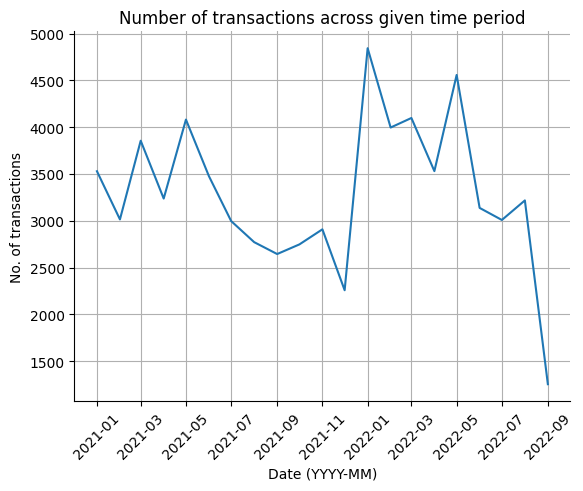

In [95]:
ax = sns.lineplot(data=combined_df,
                  x='date',
                  y='transactions',
                  errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title('Number of transactions across given time period')
ax.set_xlabel('Date (YYYY-MM)')
ax.set_ylabel('No. of transactions')
ax.spines[['right', 'top']].set_visible(False)
plt.grid()
plt.show()

### Trading Data Visualisation

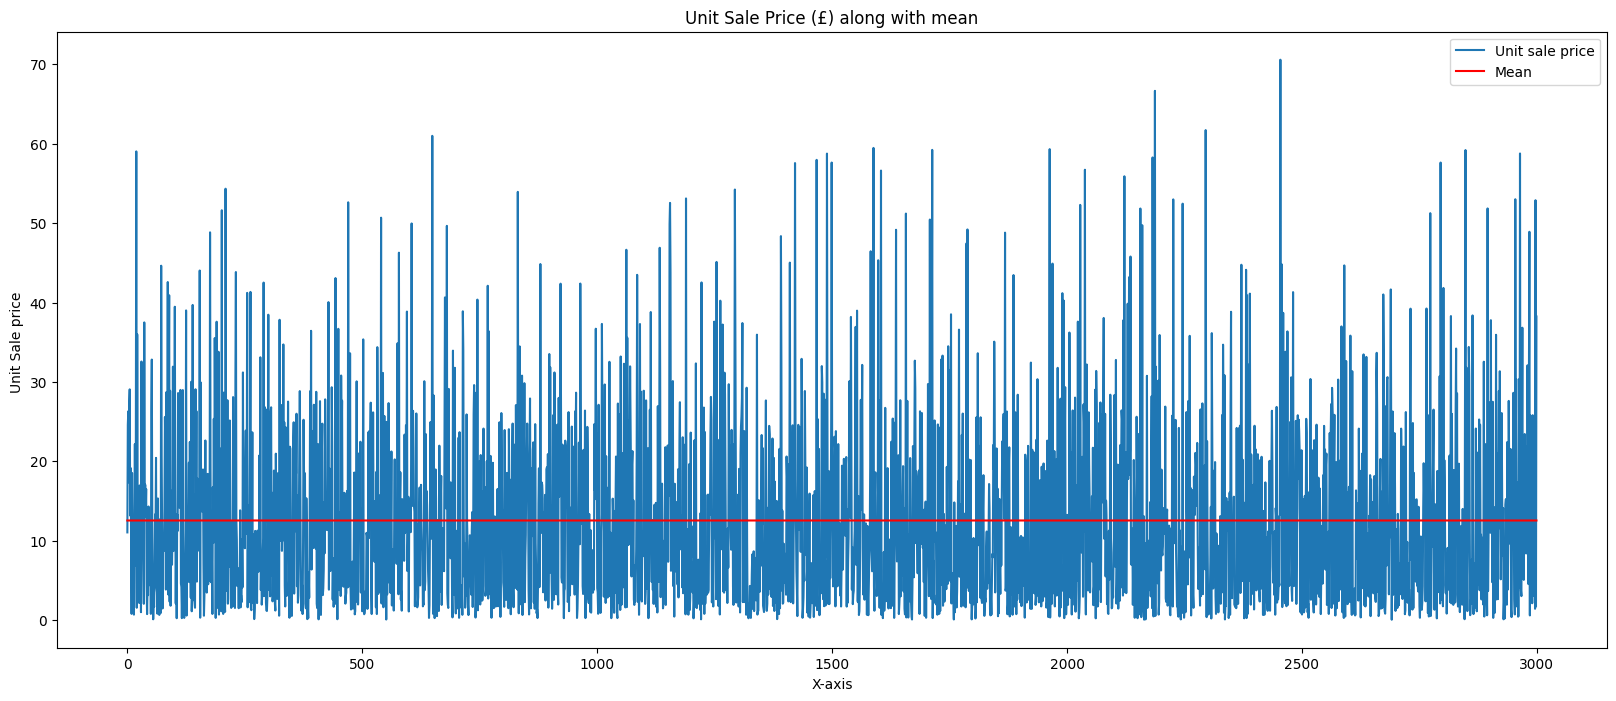

In [124]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=trading_data_df,x=trading_data_df.index,y=trading_data_df['unit_sale_price_gbp'],label='Unit sale price')
mean_plot = [trading_data_df['unit_sale_price_gbp'].mean()]*len(trading_data_df)
sns.lineplot(data=trading_data_df,x=trading_data_df.index,y=mean_plot,label='Mean',color='red')
plt.xlabel('X-axis')
plt.ylabel('Unit Sale price ') 
plt.title('Unit Sale Price (£) along with mean')
plt.legend()
plt.show()

In [125]:
display(marketing_data_df[marketing_data_df['transactions'] < marketing_data_df['new_customer_transactions']])

,date,country,tpw_channels,spend,impressions,clicks,revenue,transactions,new_customer_transactions
38,2022-09-01,IE,PLA,572,86376,629,1186,31,55
44,2022-08-01,IE,PLA,1531,246912,1527,3075,88,163
73,2022-05-01,IE,PLA,1158,193603,1134,2020,55,93
75,2022-07-01,IE,PLA,1196,208778,1180,2304,59,103
77,2022-06-01,IE,PLA,1660,274070,1898,2171,66,120
236,2022-09-01,IE,Non-Brand,158,2623,160,206,5,10
253,2022-07-01,IE,Non-Brand,400,11169,511,488,12,23
259,2022-08-01,IE,Non-Brand,546,12266,624,558,15,28
269,2022-06-01,IE,Non-Brand,738,19265,973,889,22,43
275,2022-05-01,IE,Non-Brand,660,20103,1004,1003,24,38


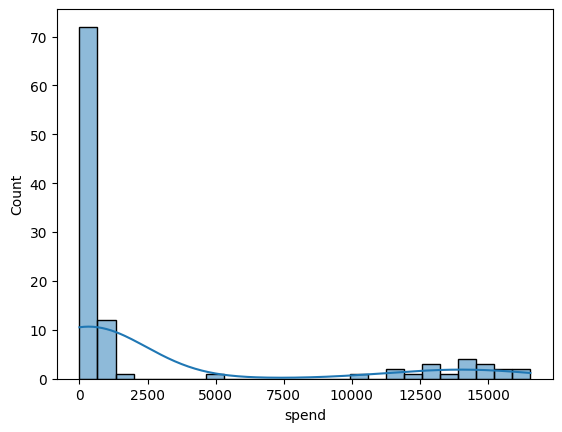

In [143]:
sns.histplot(marketing_data_df[marketing_data_df['tpw_channels'] == 'Non-Brand']['spend'], bins=25, kde=True)
plt.show() # NT combine date values